In [18]:
import pandas as pd
df = pd.read_excel('ToyotaCorolla.xlsx', sheet_name='data')

In [19]:
df.shape

(1436, 39)

In [20]:
df.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [21]:
#Get dummies for fuel type 
df = pd.get_dummies(df, columns=['Fuel_Type'])
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Color,...,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90,1,Blue,...,0,0,1,0,0,0,0,0,1,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,90,1,Silver,...,0,0,1,0,0,0,0,0,1,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,90,1,Blue,...,0,0,1,0,0,0,0,0,1,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,90,0,Black,...,0,0,1,0,0,0,0,0,1,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,90,0,Black,...,1,0,1,0,0,0,0,0,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 41 columns):
Id                   1436 non-null int64
Model                1436 non-null object
Price                1436 non-null int64
Age_08_04            1436 non-null int64
Mfg_Month            1436 non-null int64
Mfg_Year             1436 non-null int64
KM                   1436 non-null int64
HP                   1436 non-null int64
Met_Color            1436 non-null int64
Color                1436 non-null object
Automatic            1436 non-null int64
CC                   1436 non-null int64
Doors                1436 non-null int64
Cylinders            1436 non-null int64
Gears                1436 non-null int64
Quarterly_Tax        1436 non-null int64
Weight               1436 non-null int64
Mfr_Guarantee        1436 non-null int64
BOVAG_Guarantee      1436 non-null int64
Guarantee_Period     1436 non-null int64
ABS                  1436 non-null int64
Airbag_1             1436 non-

In [23]:
y = df['Price']
X = df.drop(columns=['Price', 'Color', 
                     'Id', "Model",  
                     'Mfg_Month', 'Mfg_Year',
                    'Fuel_Type_Petrol'])

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .4,
                                                  random_state=20)

<h3> The process of supervised machine learning</h3>
<img src='train_test_process.jpg' >

In [25]:
import math
from statistics import mean
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('Average error: %.2f' %mean(y_test - y_pred))
print('Mean absolute error: %.2f' %mean_absolute_error(y_test, y_pred))
print('Mean absolute error: %.2f' %(mean(abs(y_test - y_pred))))
print("Root mean squared error: %.2f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))
print('percentage absolute error: %.2f' %mean(abs((y_test - y_pred)/y_test)))
print('percentage absolute error: %.2f' %(mean(abs(y_test - y_pred))/mean(y_test)))
print('R-squared: %.2f' % r2_score(y_test, y_pred))

Average error: 10.14
Mean absolute error: 936.89
Mean absolute error: 936.89
Root mean squared error: 1917.60
percentage absolute error: 0.09
percentage absolute error: 0.09
R-squared: 0.73


In [26]:
import numpy as np
coefficients = np.column_stack((X.columns, regr.coef_)) #join column names and coeffcients
print('Coefficients: \n', coefficients)

Coefficients: 
 [['Age_08_04' -108.85571500751234]
 ['KM' -0.01601378489148326]
 ['HP' 32.49555675458907]
 ['Met_Color' -49.81114074712826]
 ['Automatic' 509.8798352590316]
 ['CC' -2.5184584134200647]
 ['Doors' 77.75416967288497]
 ['Cylinders' -6.400568963726982e-10]
 ['Gears' 100.98362042369288]
 ['Quarterly_Tax' 18.214541562723877]
 ['Weight' 14.134845694203266]
 ['Mfr_Guarantee' 198.0598768883527]
 ['BOVAG_Guarantee' 584.3347765744367]
 ['Guarantee_Period' 71.46347636722696]
 ['ABS' -203.22924098663648]
 ['Airbag_1' -258.33417023843504]
 ['Airbag_2' -69.62317078084213]
 ['Airco' 197.357028203751]
 ['Automatic_airco' 2369.9824048844507]
 ['Boardcomputer' -111.36668825217384]
 ['CD_Player' 326.0646372270601]
 ['Central_Lock' 77.74493305929295]
 ['Powered_Windows' 306.88418107084874]
 ['Power_Steering' 459.5966022713743]
 ['Radio' 505.29738949284547]
 ['Mistlamps' -221.11779960106503]
 ['Sport_Model' 195.4731038501809]
 ['Backseat_Divider' -281.2290894475395]
 ['Metallic_Rim' 211.21822

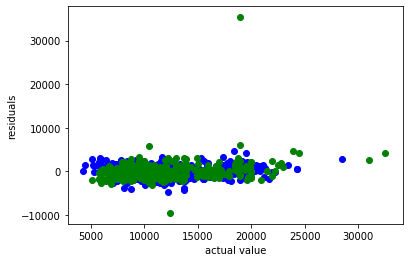

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot predicted values vs residual
#use blue for residuals of training data
plt.scatter(regr.predict(x_train), y_train - regr.predict(x_train), c='b') 
#use green for residuals of test data
plt.scatter(y_test, y_test - y_pred, c='g') 
plt.ylabel('residuals')
plt.xlabel('actual value')
plt.show()

Below we use recursive feature elimination to select the best model with 5 features.<br> 
the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE'>more information</a>

In [28]:
#need to normalize data before using RFE

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_normalized = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test_normalized = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

In [29]:
from sklearn.feature_selection import RFE
regr = LinearRegression()
#parameters: estimator, n_features_to_select=None, step=1
selector = RFE(regr, 5, step=1) 
selector.fit(x_train_normalized, y_train)
selector.support_

array([ True,  True,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [30]:
selector.ranking_

array([ 1,  1,  1, 28, 17,  2, 20, 30, 29,  3,  1, 13, 10,  8, 19, 24, 26,
       14,  1, 22, 11, 25,  9, 23,  5, 15, 18, 12, 16,  4, 27, 21,  7,  6])

In [31]:
selector.estimator_.coef_

array([-2149.1125531 ,  -733.50379954,   293.23284952,   731.80111809,
         577.26935824])

In [32]:
def show_best_model(support_array, columns, model, test_data, test_labels):
    y_pred = model.predict(test_data.iloc[:, support_array])
    r2 = r2_score(test_labels, y_pred)
    n = len(y_pred) #size of test set
    p = len(model.coef_) #number of features
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('Adjusted R-squared: %.2f' % adjusted_r2)
    j = 0;
    for i in range(len(support_array)):
        if support_array[i] == True:
            print(columns[i], model.coef_[j])
            j +=1

In [33]:
show_best_model(selector.support_, x_train.columns, selector.estimator_, x_test_normalized, y_test)

Adjusted R-squared: 0.88
Age_08_04 -2149.1125531004336
KM -733.5037995438827
HP 293.2328495218626
Weight 731.8011180932692
Automatic_airco 577.2693582381627
